In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


Found 2499 images belonging to 13 classes.
Found 619 images belonging to 13 classes.
Found 540 images belonging to 13 classes.


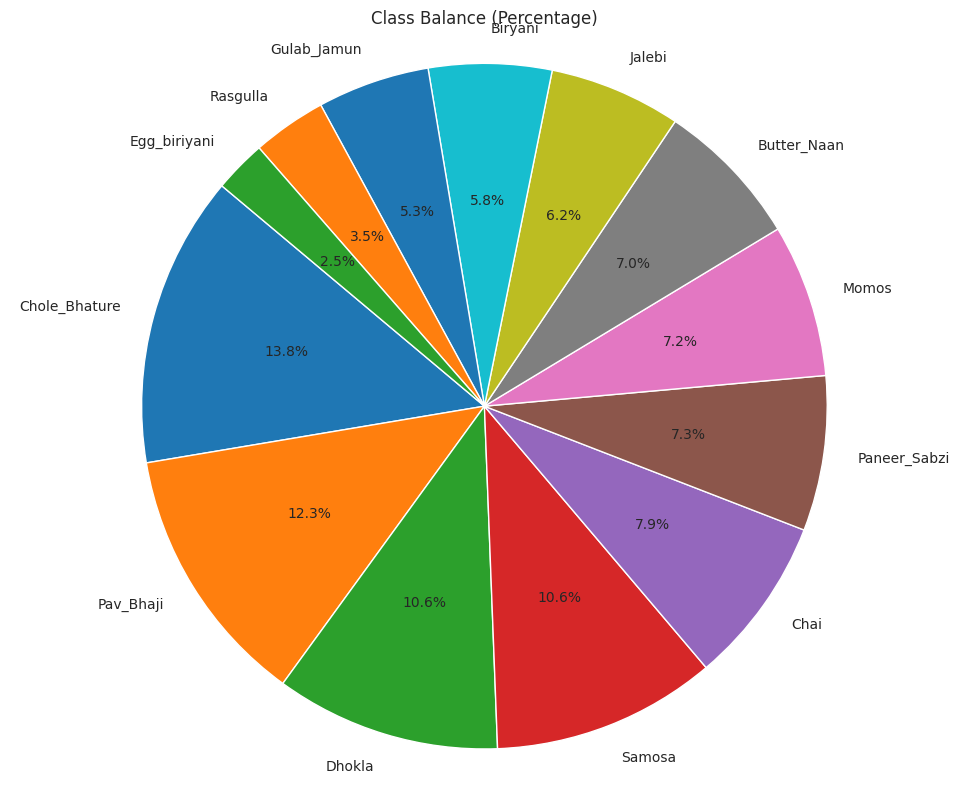

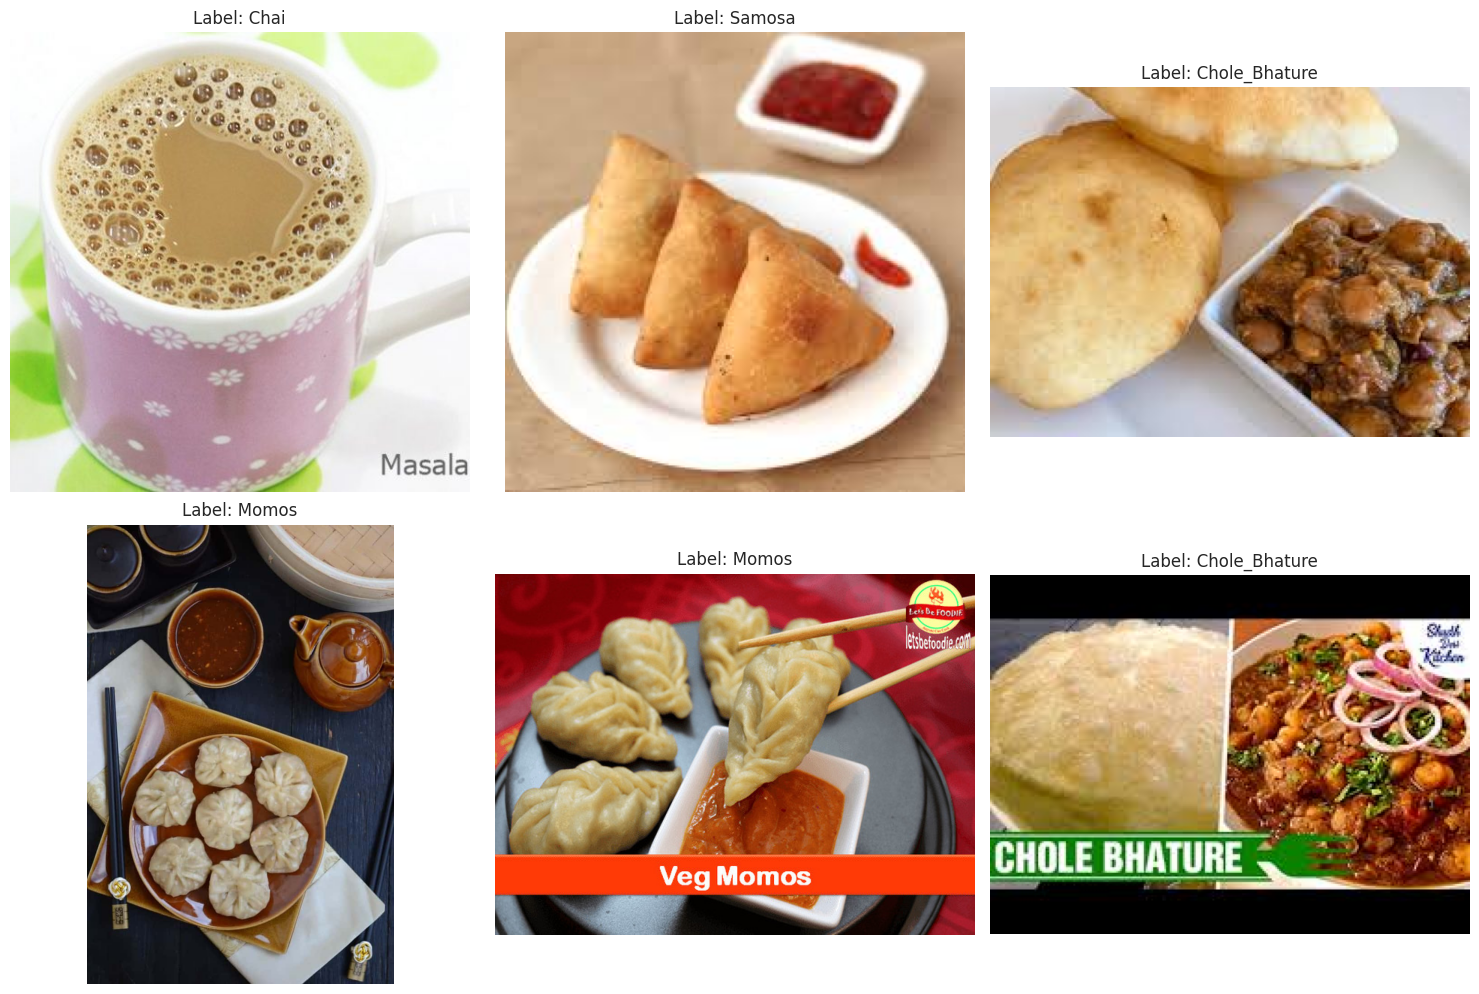

Epoch 1/5
79/79 [==============================] - 111s 1s/step - loss: 5.5629 - accuracy: 0.7459 - val_loss: 5.0926 - val_accuracy: 0.7900 - lr: 0.0010
Epoch 2/5
79/79 [==============================] - 90s 1s/step - loss: 4.3995 - accuracy: 0.9212 - val_loss: 4.2746 - val_accuracy: 0.9079 - lr: 0.0010
Epoch 3/5
79/79 [==============================] - 93s 1s/step - loss: 3.9527 - accuracy: 0.9392 - val_loss: 3.8706 - val_accuracy: 0.9144 - lr: 0.0010
Epoch 4/5
79/79 [==============================] - 87s 1s/step - loss: 3.5415 - accuracy: 0.9700 - val_loss: 3.4908 - val_accuracy: 0.9354 - lr: 0.0010
Epoch 5/5
20/20 [==============================] - 17s 844ms/step - loss: 3.2006 - accuracy: 0.9483
Validation Accuracy: 94.83%
Validation Loss: 3.2006


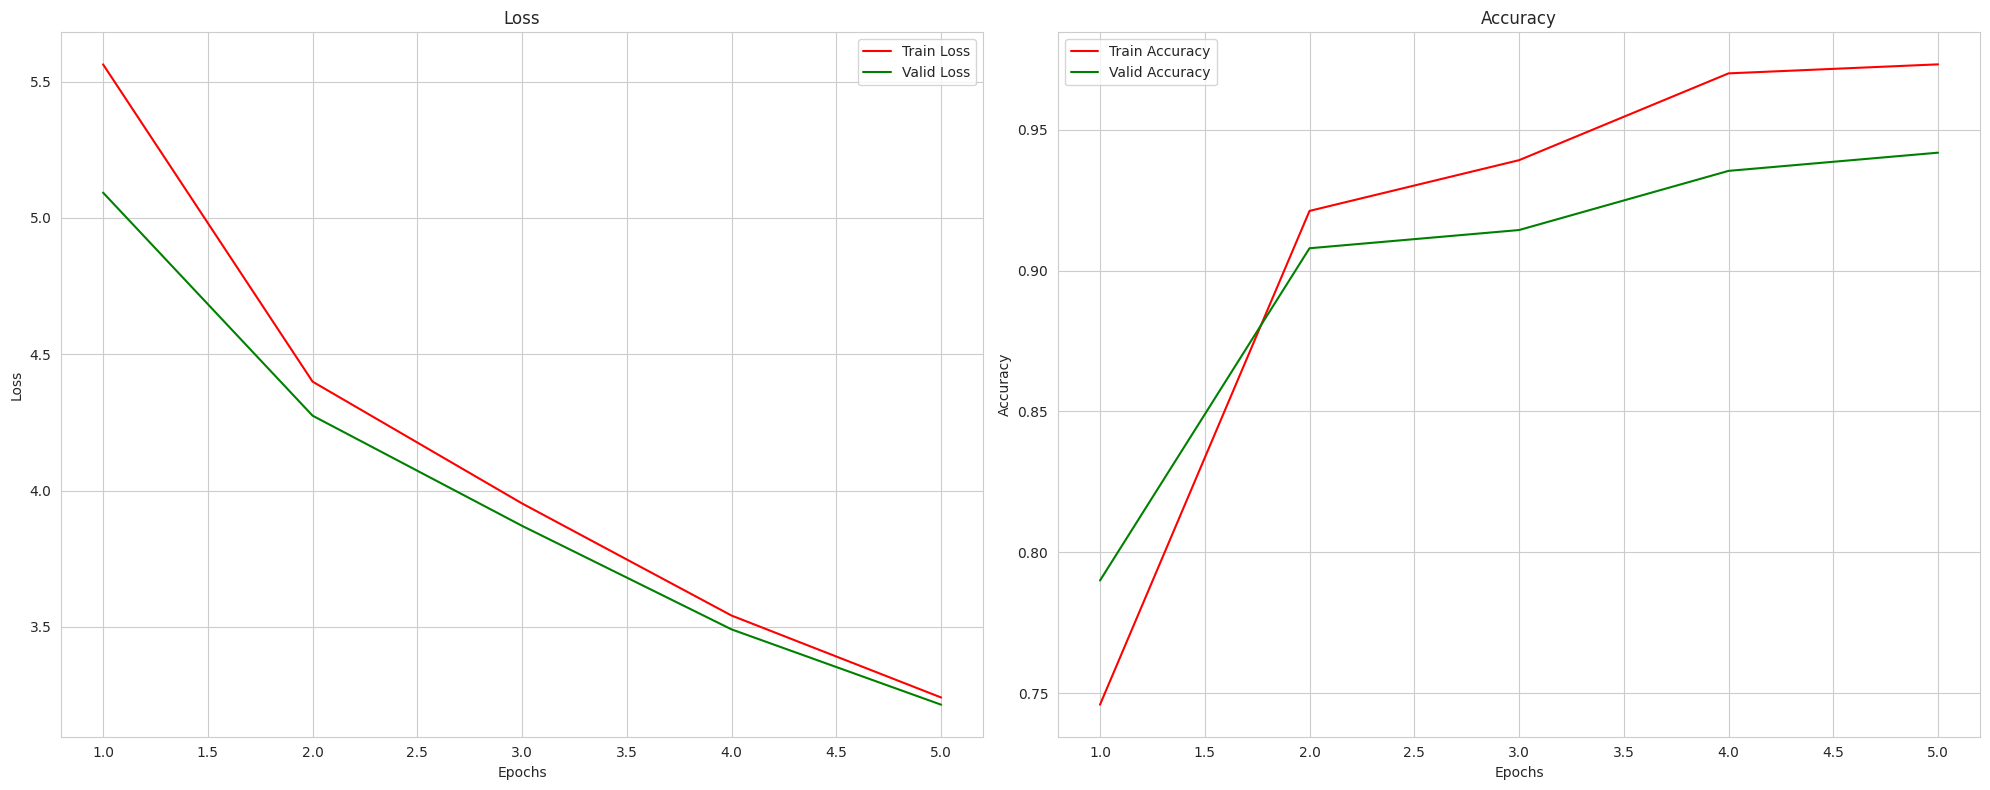

17/17 [==============================] - 3s 148ms/step


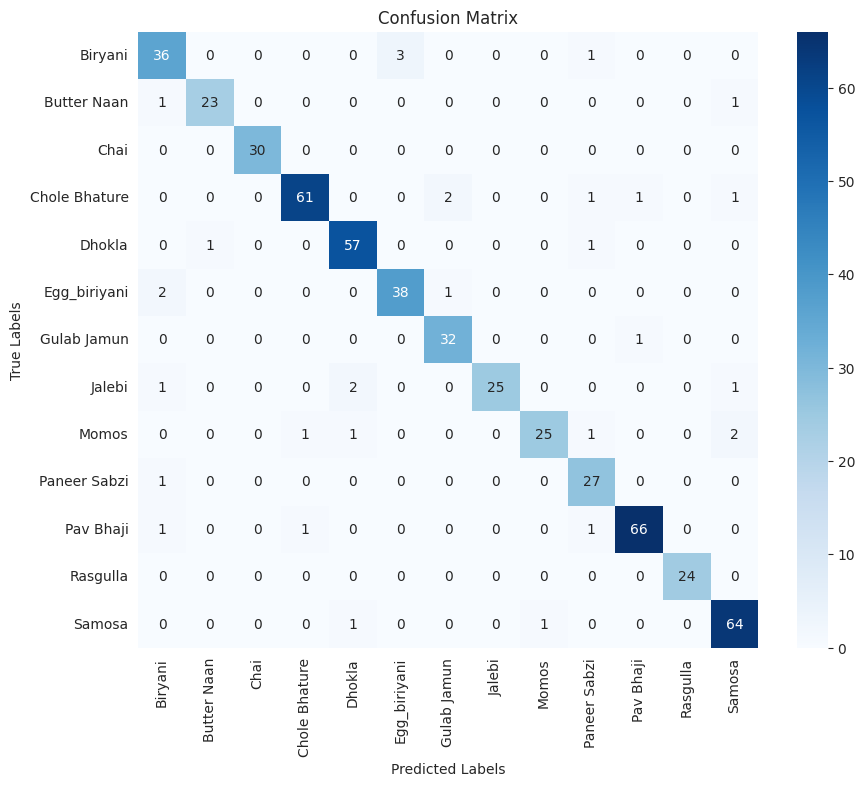

Classification Report:
               precision    recall  f1-score   support

      Biryani       0.86      0.90      0.88        40
  Butter Naan       0.96      0.92      0.94        25
         Chai       1.00      1.00      1.00        30
Chole Bhature       0.97      0.92      0.95        66
       Dhokla       0.93      0.97      0.95        59
 Egg_biriyani       0.93      0.93      0.93        41
  Gulab Jamun       0.91      0.97      0.94        33
       Jalebi       1.00      0.86      0.93        29
        Momos       0.96      0.83      0.89        30
 Paneer Sabzi       0.84      0.96      0.90        28
    Pav Bhaji       0.97      0.96      0.96        69
     Rasgulla       1.00      1.00      1.00        24
       Samosa       0.93      0.97      0.95        66

     accuracy                           0.94       540
    macro avg       0.94      0.94      0.94       540
 weighted avg       0.94      0.94      0.94       540

1/1 [==============================] - 

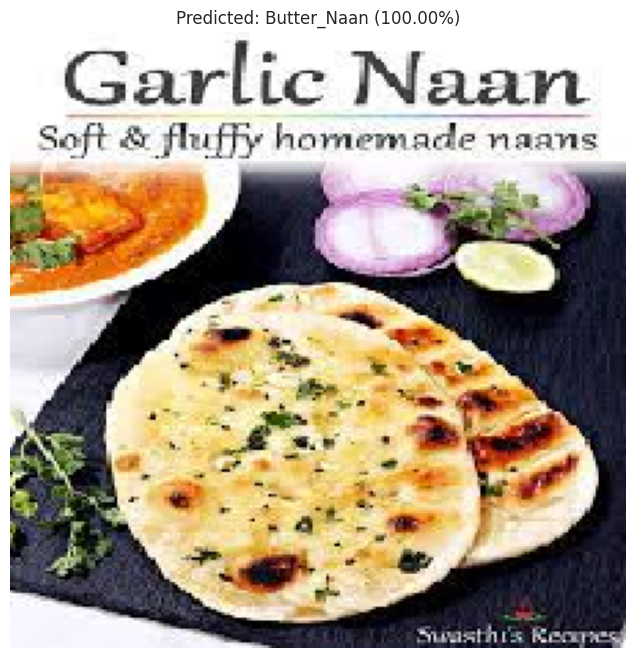


1/1 [==============================] - 0s 51ms/step
Image: /content/drive/MyDrive/test1/Egg_biriyani/11.jpg
Predicted Label: Egg_biriyani
Confidence: 99.84%


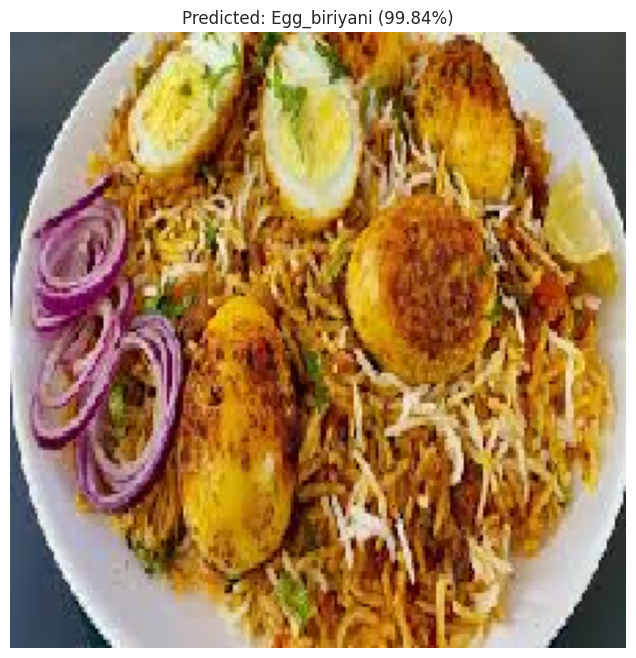


1/1 [==============================] - 0s 38ms/step
Image: /content/drive/MyDrive/test1/Biryani/image_14.jpg
Predicted Label: Biryani
Confidence: 99.94%


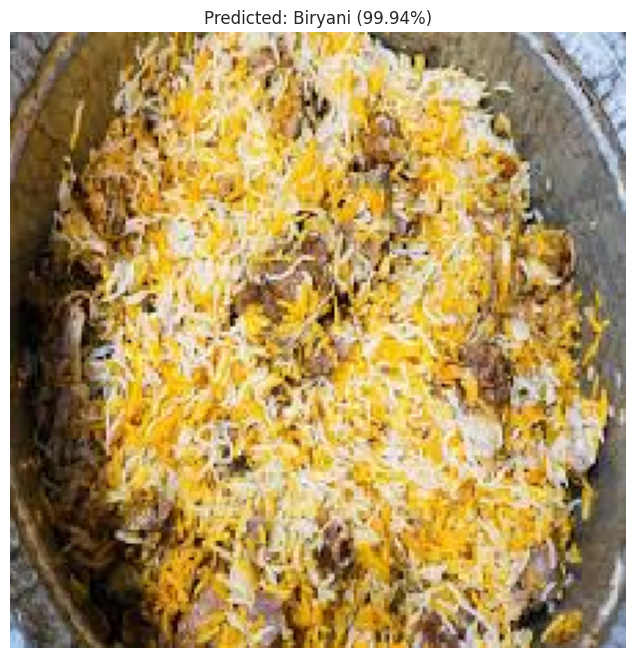

In [ ]:
import cv2
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
sns.set_style('whitegrid')
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, Activation, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing import image

# Warnings
import warnings
warnings.filterwarnings('ignore')
import os

# Paths to your data
train_data_path = '/content/drive/MyDrive/own_db2/train'
test_data_path = '/content/drive/MyDrive/test1'

def create_dataframe(data_path):
    filepaths = []
    labels = []
    folds = os.listdir(data_path)

    for fold in folds:
        f_path = os.path.join(data_path, fold)
        imgs = os.listdir(f_path)

        for img in imgs:
            img_path = os.path.join(f_path, img)
            filepaths.append(img_path)
            labels.append(fold)

    fseries = pd.Series(filepaths, name='Filepaths')
    lseries = pd.Series(labels, name='Labels')
    return pd.concat([fseries, lseries], axis=1)

# Create DataFrames for train and test
train_df = create_dataframe(train_data_path)
test_df = create_dataframe(test_data_path)

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # Use 20% of training data for validation
)

test_datagen = ImageDataGenerator(rescale=1./255)

batch_size = 32

train_generator = train_datagen.flow_from_directory(
    train_data_path,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    train_data_path,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

test_generator = test_datagen.flow_from_directory(
    test_data_path,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Calculate class counts
class_counts = train_df['Labels'].value_counts().reset_index()
class_counts.columns = ['Class', 'Count']
total_images = len(train_df)
class_counts['Percentage'] = (class_counts['Count'] / total_images) * 100
class_counts = class_counts.sort_values(by='Count', ascending=False)

# Create the pie chart
plt.figure(figsize=(10, 8))
plt.pie(class_counts['Percentage'], labels=class_counts['Class'], autopct='%1.1f%%', startangle=140)
plt.title('Class Balance (Percentage)')
plt.axis('equal')
plt.tight_layout()
plt.show()

def plot_samples(df, num_samples=6):
    plt.figure(figsize=(15, 10))
    for i in range(num_samples):
        rand_idx = np.random.randint(0, len(df))
        img_path = df.iloc[rand_idx]['Filepaths']
        label = df.iloc[rand_idx]['Labels']

        img = plt.imread(img_path)
        plt.subplot(2, 3, i+1)
        plt.imshow(img)
        plt.title(f'Label: {label}')
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Plot 6 random samples
plot_samples(train_df)

base_model = tf.keras.applications.xception.Xception(weights='imagenet', include_top=False, input_shape=(224, 224, 3), pooling='max')

num_classes = len(train_generator.class_indices)

model = Sequential([
    base_model,
    BatchNormalization(),
    Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.5),
    Dense(num_classes, activation='softmax', kernel_regularizer=regularizers.l2(0.01))
])

model.compile(Adamax(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=1e-6)

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=5,
    callbacks=[early_stopping, reduce_lr],
    verbose=1,
    shuffle=False
)

val_loss, val_accuracy = model.evaluate(val_generator, steps=len(val_generator))

print(f'Validation Accuracy: {val_accuracy*100:.2f}%')
print(f'Validation Loss: {val_loss:.4f}')

tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

epochs = range(1, len(tr_acc) + 1)

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs, tr_loss, 'r', label='Train Loss')
plt.plot(epochs, val_loss, 'g', label='Valid Loss')
plt.title('Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(epochs, tr_acc, 'r', label='Train Accuracy')
plt.plot(epochs, val_acc, 'g', label='Valid Accuracy')
plt.title('Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()

# Predictions on test data
test_generator.reset()
pred = model.predict(test_generator, steps=len(test_generator), verbose=1)

# Get true labels
true_labels = test_generator.classes

# Get predicted labels
predicted_labels = np.argmax(pred, axis=1)

# Get the class labels
class_labels = list(test_generator.class_indices.keys())

# Create confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Create the confusion matrix DataFrame
cm_df = pd.DataFrame(cm, index=class_labels, columns=class_labels)

plt.figure(figsize=(10, 8))
sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Classification Report
cr = classification_report(true_labels, predicted_labels, target_names=class_labels)
print("Classification Report:")
print(cr)

# Function to predict on a single image
def predict_image(model, img_path, target_size=(224, 224)):
    # Load the image
    img = image.load_img(img_path, target_size=target_size)

    # Convert the image to a numpy array
    img_array = image.img_to_array(img)

    # Expand dimensions to match the batch size expected by the model
    img_array = np.expand_dims(img_array, axis=0)

    # Preprocess the image (scale pixel values)
    img_array /= 255.0

    # Get the model's prediction
    prediction = model.predict(img_array)

    # Get the class with the highest probability
    predicted_class = np.argmax(prediction, axis=1)[0]

    # Get the class labels
    class_labels = list(train_generator.class_indices.keys())

    # Get the predicted label
    predicted_label = class_labels[predicted_class]

    # Get the confidence (probability) of the prediction
    confidence = np.max(prediction) * 100

    return predicted_label, confidence

# Example usage:
# Replace these paths with actual paths to your test images
test_images = [
    '/content/drive/MyDrive/test1/Butter Naan/image_13.jpg',
    '/content/drive/MyDrive/test1/Egg_biriyani/11.jpg',
    '/content/drive/MyDrive/test1/Biryani/image_14.jpg'
]

for img_path in test_images:
    predicted_label, confidence = predict_image(model, img_path)
    print(f"Image: {img_path}")
    print(f"Predicted Label: {predicted_label}")
    print(f"Confidence: {confidence:.2f}%")

    # Display the image with prediction
    plt.figure(figsize=(8, 8))
    img = image.load_img(img_path, target_size=(224, 224))
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_label} ({confidence:.2f}%)")
    plt.axis('off')
    plt.show()
    print()